In [1]:
!pip install thefittest

Cloning into 'thefittest_clone'...
remote: Enumerating objects: 4447, done.
remote: Counting objects: 100% (853/853), done.
remote: Compressing objects: 100% (303/303), done.
remote: Total 4447 (delta 544), reused 824 (delta 527), pack-reused 3594
Receiving objects: 100% (4447/4447), 19.61 MiB | 15.01 MiB/s, done.
Resolving deltas: 100% (2731/2731), done.


##Using Genetic Programming for Symbolic Regression

$$y = \frac{1}{2} x \sin(3 x)$$

In [26]:
import numpy as np


def problem(x):
    return np.sin(x[:,0]*3)*x[:,0]*0.5

0-th iteration with the best fitness = 0.7834065001372698
10-th iteration with the best fitness = 0.6050507660515595
20-th iteration with the best fitness = 0.5955476914855647
30-th iteration with the best fitness = 0.5949733054525806
40-th iteration with the best fitness = 0.5881170769251499
50-th iteration with the best fitness = 0.5881170769251499
60-th iteration with the best fitness = 0.5842543858419732
70-th iteration with the best fitness = 0.5842543858419732
80-th iteration with the best fitness = 0.562714088164022
90-th iteration with the best fitness = 0.5616330674150908
The fittest individ: cos(((cos((x0 * (cos(8.7364) + 2.5246))) + 2.5289) * 2.5289))


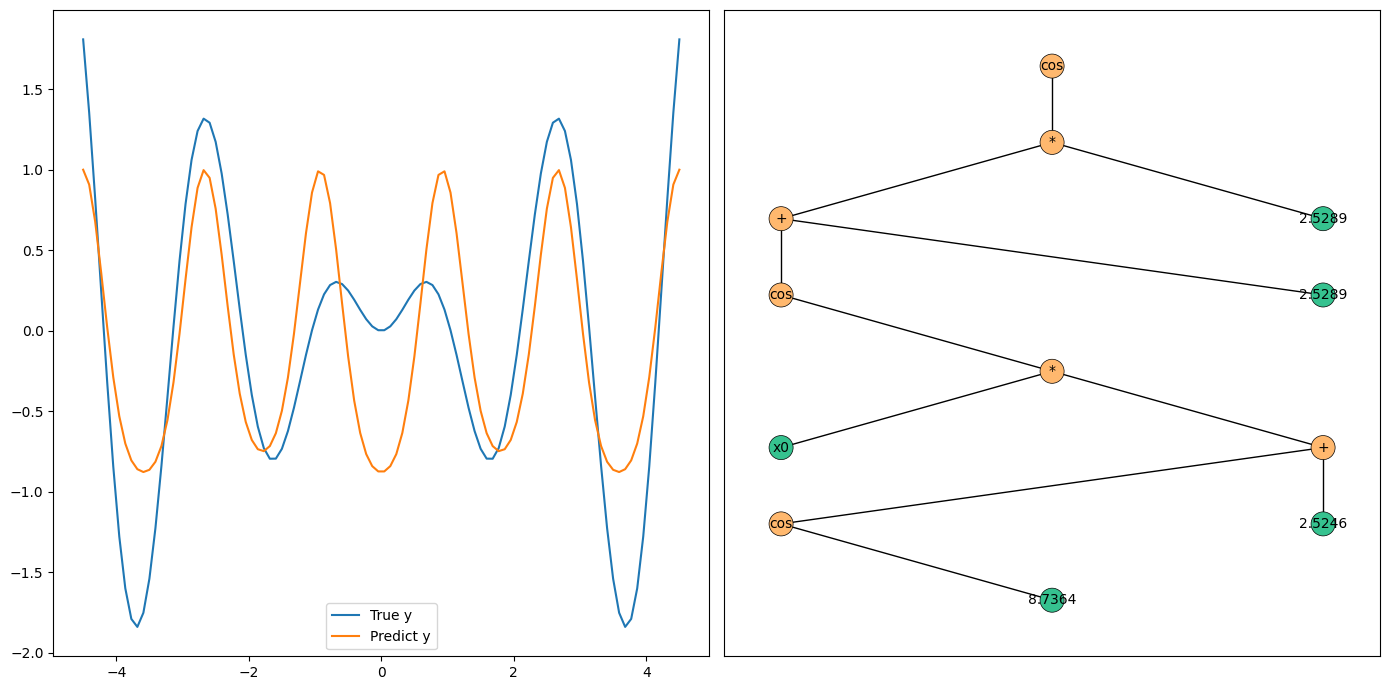

In [27]:
import matplotlib.pyplot as plt

from thefittest.regressors import GeneticProgrammingRegressor
from thefittest.optimizers import PDPGP

n_dimension = 2
left_border = -4.5
right_border = 4.5
sample_size = 100


X = np.array([np.linspace(left_border, right_border, sample_size)
              for _ in range(n_dimension)]).T
y = problem(X)

model = GeneticProgrammingRegressor(n_iter=100,
                                    pop_size=1000,
                                    optimizer=PDPGP,
                                    optimizer_args={"show_progress_each": 10})

model.fit(X, y)
predict = model.predict(X)

tree = model.get_tree()
print('The fittest individ:', tree)

fig, ax = plt.subplots(figsize=(14, 7), ncols=2, nrows=1)

ax[0].plot(X[:,0], y, label = "True y")
ax[0].plot(X[:,0], predict, label = "Predict y")
ax[0].legend()

tree.plot(ax=ax[1])

plt.tight_layout()
plt.show()